In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
np.random.seed(50)
height=np.random.randint(140,200,200)
weight=np.random.randint(40,120,200)
bmi = weight/((height/100)**2)

# BMI=pd.DataFrame({"Height":height,"Weight":weight,"BMI":bmi})
# BMI

def cateogary(bmi):
    bmi=float(bmi)
    if bmi<=19 and bmi>1:
        return "Under Weight"
    if bmi<=25 and bmi>19:
        return "Normal"
    else:
        return "Over Weight"

# BMI['Cateogary']=BMI['BMI'].apply(cateogary)
# BMI

cateogary=np.array([cateogary(b) for b in bmi])  #to make the results come in array we use this
cateogary

BMI=pd.DataFrame({"Height":height,"Weight":weight,"Cateogary":cateogary})
BMI

,Height,Weight,Cateogary
0,188,104,Over Weight
1,172,118,Over Weight
2,151,92,Over Weight
3,185,66,Normal
4,173,85,Over Weight
...,...,...,...
195,154,87,Over Weight
196,196,99,Over Weight
197,142,70,Over Weight
198,180,103,Over Weight


In [14]:
# def cateogary(bmi):
#     bmi=float(bmi)
#     if bmi<=19 and bmi>1:
#         return "Under Weight"
#     if bmi<=25 and bmi>19:
#         return "Normal"
#     else:
#         return "Over Weight"

# # BMI['Cateogary']=BMI['BMI'].apply(cateogary)
# # BMI

# cateogary=np.array([cateogary(b) for b in bmi])  #to make the results come in array we use this
# cateogary

array(['Over Weight', 'Over Weight', 'Over Weight', 'Normal',
       'Over Weight', 'Over Weight', 'Over Weight', 'Over Weight',
       'Over Weight', 'Over Weight', 'Over Weight', 'Over Weight',
       'Over Weight', 'Over Weight', 'Over Weight', 'Under Weight',
       'Over Weight', 'Over Weight', 'Normal', 'Over Weight', 'Normal',
       'Over Weight', 'Over Weight', 'Over Weight', 'Normal',
       'Over Weight', 'Normal', 'Normal', 'Over Weight', 'Over Weight',
       'Over Weight', 'Under Weight', 'Over Weight', 'Over Weight',
       'Under Weight', 'Over Weight', 'Under Weight', 'Over Weight',
       'Over Weight', 'Over Weight', 'Over Weight', 'Over Weight',
       'Normal', 'Under Weight', 'Normal', 'Over Weight', 'Over Weight',
       'Over Weight', 'Over Weight', 'Over Weight', 'Over Weight',
       'Over Weight', 'Normal', 'Over Weight', 'Over Weight',
       'Over Weight', 'Over Weight', 'Normal', 'Over Weight',
       'Over Weight', 'Over Weight', 'Over Weight', 'Over Weig

In [16]:
L_C = LabelEncoder()
BMI['Cateogary']=L_C.fit_transform(BMI["Cateogary"])
BMI

,Height,Weight,Cateogary
0,188,104,1
1,172,118,1
2,151,92,1
3,185,66,0
4,173,85,1
...,...,...,...
195,154,87,1
196,196,99,1
197,142,70,1
198,180,103,1


In [17]:
X=BMI[["Height","Weight"]]
Y=BMI["Cateogary"]



In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=50)
print(X_train,X_test,Y_train,Y_test)

     Height  Weight
114     190      64
187     166      86
76      185     118
122     198      91
142     141      40
..      ...     ...
132     157      50
33      140     102
109     184      79
139     199      94
176     149      95

[140 rows x 2 columns]      Height  Weight
112     178      67
165     162      48
12      145      59
73      198     116
144     148      40
20      175      67
199     162      98
8       177     118
39      170     112
88      172     103
81      141      90
197     142      70
69      147      43
160     170     109
25      146      91
99      193      54
151     196      54
23      166     117
138     167     114
159     151      67
89      159     119
82      149      83
24      166      61
174     197      56
137     167      65
83      169      72
107     180      45
34      199      52
97      176      94
167     177      83
123     192      77
157     190      90
75      140      61
152     155      44
117     168      49
149     143     

In [19]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

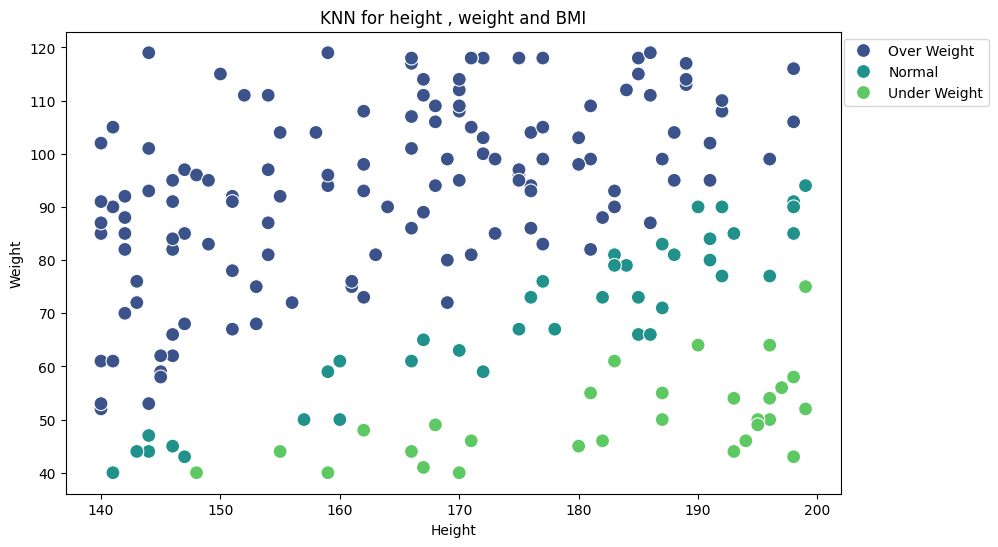

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette="viridis",s=100)
plt.title("KNN for height , weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()

Enter your Height in cm :  150
Enter your Weight in kg:  62


C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\singh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Distance = [[4.         5.         5.65685425 6.70820393]]


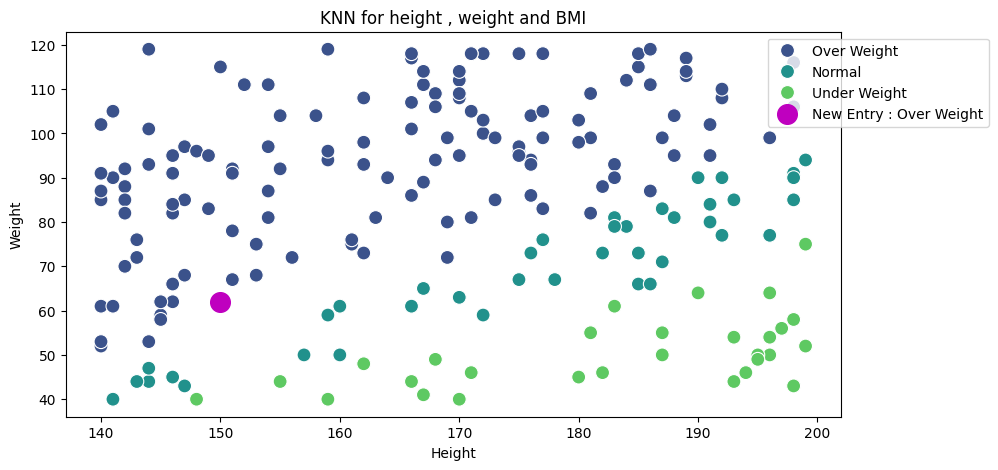

Height =150.0 | Weight=62.0 | Predicted_Cateogary =Over Weight


In [35]:
def predictBMI(data,model,L_C):
    p=model.predict(data)
    P_C=L_C.inverse_transform(p)[0]
    return P_C
    # input_data=np.array(['height','weight'])
    
user_H=float(input("Enter your Height in cm : "))
user_W=float(input("Enter your Weight in kg: "))


input_data=np.array([[user_H,user_W]])
predicted_Cateogary=predictBMI(input_data,model,L_C)

D,I=model.kneighbors(input_data,n_neighbors=4)

print(f"Distance = {D}")

plt.figure(figsize=(10,5))
#training data plot
sns.scatterplot(data=X,x=height,y=weight,hue=L_C.inverse_transform(Y),palette="viridis",s=100)

#input data plot
plt.scatter(input_data[0,0],input_data[0,1],color='m',s=200,label=f'New Entry : {predicted_Cateogary}')
plt.title("KNN for height , weight and BMI")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc="upper right",bbox_to_anchor=(1,0.2,0.2,0.8))
plt.show()
print(f"Height ={user_H} | Weight={user_W} | Predicted_Cateogary ={predicted_Cateogary}")